In [150]:
#import libraries

# 1. to handle the data

import pandas as pd
import numpy as np

# to visualize the dataset

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
%matplotlib inline
from matplotlib.colors import ListedColormap

In [151]:
# Load the dataset
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_submission = pd.read_csv('data/sample_submission.csv')
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Dataset Basic Information

In [152]:
# Display a concise summary of the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB



## Inferences:

- Number of Entries: The dataset consists of 8693 entries, ranging from index 0 to 8693.

- Columns: There are 14 columns in the dataset corresponding to various attributes of the Spaceship Titanic dataset.

- Data Types:
    - There are 6 columns of the `float64` data type and 7 columns of the `object` data type.
    - Target(Transported) is of the `boolean` data type.

- Missing Values: There are missing values in the dataset.




In [153]:
# Define the continuous features
continuous_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' , 'VRDeck']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in df_train.columns if feature not in continuous_features]

# Convert the identified features to object data type
df_train[features_to_convert] = df_train[features_to_convert].astype('object')

### Summary Statistics for Numerical Variables

In [154]:
# Get the summary statistics for numerical variables
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


## Inference:

Age:  The average age remains at 28.83 years, with a wide range among visitors (0-79 years).

---

Room Service: This remains the most popular facility with the highest number of visitors. However, the average amount spent is relatively low (224.69), suggesting guests might use it for smaller purchases or orders.

---

Food Court: While having slightly fewer visitors than Room Service, the average amount spent is significantly higher (458.08). This suggests people tend to spend more at the food court, potentially making larger purchases or dining for longer periods.

---

Spa: Despite having the third-highest number of visits, the spa has the second-highest average amount spent (311.14). This indicates that people who visit the spa tend to spend more on treatments or services. Moreover, the highest recorded amount spent at the spa is quite substantial (22408), suggesting potential high-value packages or services.

---

Shopping Mall: This facility again has the lowest number of visitors and the lowest average amount spent, potentially indicating it's the least popular among guests in terms of overall spending.

---

VRDeck: Similar to the Spa, the VRDeck has a high average amount spent (304.85) despite having a lower number of visitors. This suggests that people who use the VRDeck tend to engage in experiences that may involve higher individual costs.

---

Distribution of Amounts: Similar to the previous analysis, the high standard deviation values across all facilities suggest a significant variation in individual spending amounts within each category.

## Numerical Variables Univariate Analysis

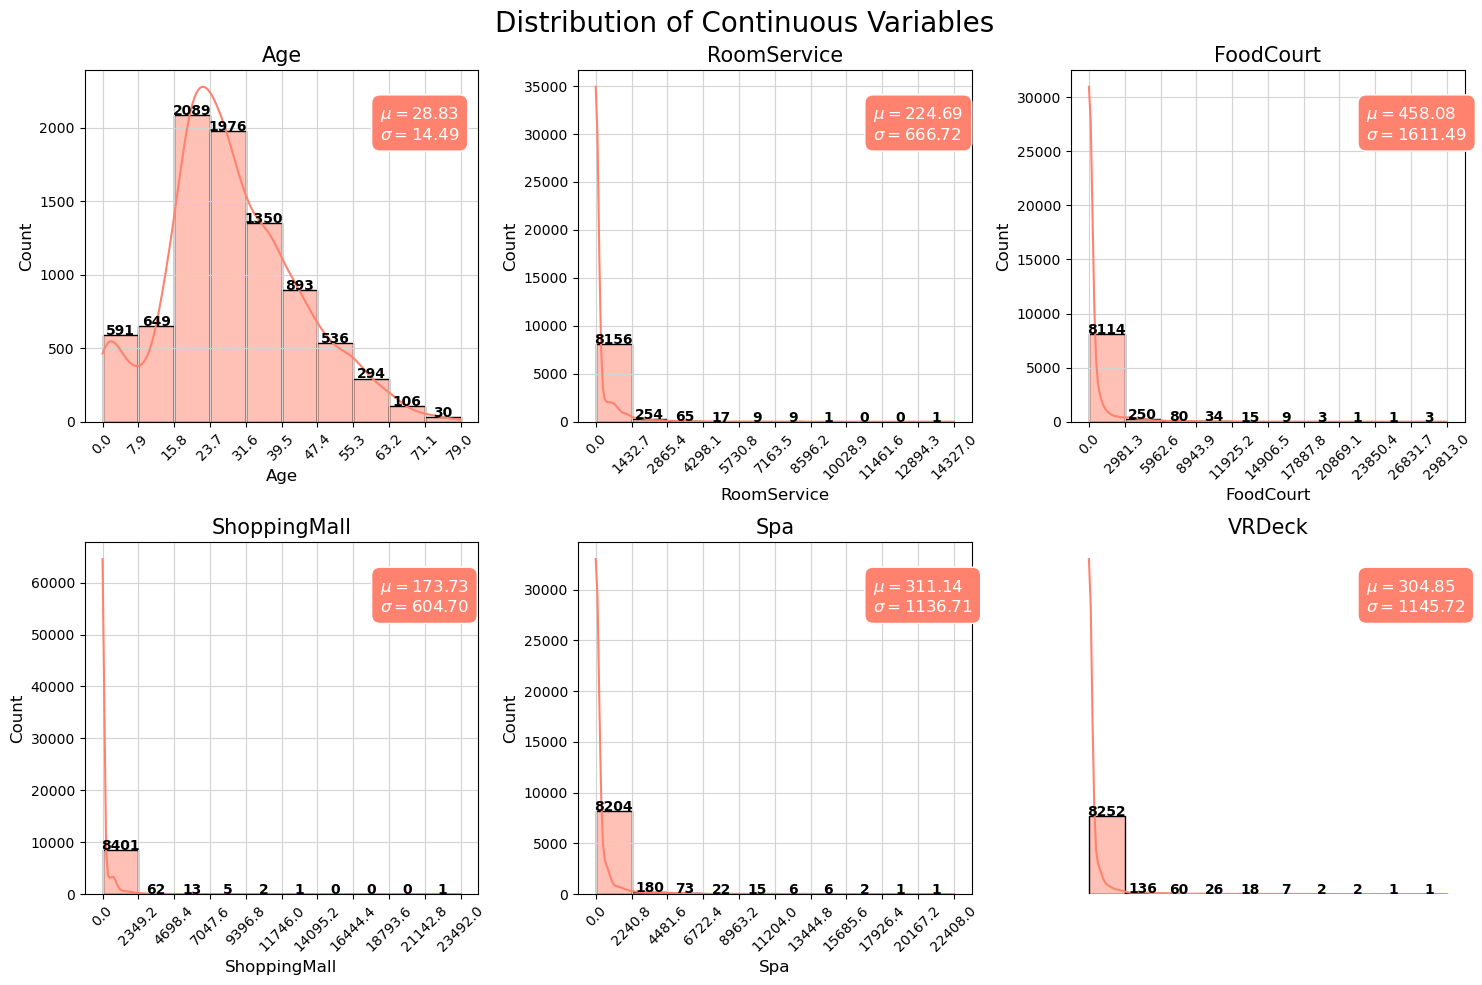

In [155]:
# Filter out continuous features for the univariate analysis
df_continuous = df_train[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature

for i , col in enumerate(df_continuous.columns):
    x = i // 3 
    y = i % 3
    
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(ax=ax[x, y], data=df_continuous, x=col, kde=True, bins=bin_edges )
    
    ax[x, y].set_title(col , fontsize=15)
    ax[x, y].set_xlabel(col , fontsize=12)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))
    
    

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()    
    
    


## Inference:

- ``Age``: The age distribution is right-skewed, with a peak between 15-30 years. This suggests that the majority of passangers are relatively young. The mean age is approximately 28.83 years with a standard deviation of 14.49 years.

- ``Room Service``: Most of the passangers(8156) who spent on room service spent between 0-2891.3 . The mean amount spent is approximately 224.69 with a standard deviation of 1611.49.

- ``Food Court``: Most of the passangers(8114) who spent on food court spent between 0-4580.8. The mean amount spent is approximately 458.08 with a standard deviation of 1343.68.

- ``Spa``: Most of the passangers(8204) who spent on spa spent between 0-2240.8. The mean amount spent is approximately 311.14 with a standard deviation of 1136.71.

- ``Shopping Mall``: Most of the passangers(8401) who spent on shopping mall spent between 0-2349.2. The mean amount spent is approximately 173.13 with a standard deviation of 604.70.

## Categorical Variables Univariate Analysis

In [156]:
categorical_features = df_train.columns.difference(continuous_features)

df_categorical = df_train[categorical_features]

df_categorical

,Cabin,CryoSleep,Destination,HomePlanet,Name,PassengerId,Transported,VIP
0,B/0/P,False,TRAPPIST-1e,Europa,Maham Ofracculy,0001_01,False,False
1,F/0/S,False,TRAPPIST-1e,Earth,Juanna Vines,0002_01,True,False
2,A/0/S,False,TRAPPIST-1e,Europa,Altark Susent,0003_01,False,True
3,A/0/S,False,TRAPPIST-1e,Europa,Solam Susent,0003_02,False,False
4,F/1/S,False,TRAPPIST-1e,Earth,Willy Santantines,0004_01,True,False
...,...,...,...,...,...,...,...,...
8688,A/98/P,False,55 Cancri e,Europa,Gravior Noxnuther,9276_01,False,True
8689,G/1499/S,True,PSO J318.5-22,Earth,Kurta Mondalley,9278_01,False,False
8690,G/1500/S,False,TRAPPIST-1e,Earth,Fayey Connon,9279_01,True,False
8691,E/608/S,False,55 Cancri e,Europa,Celeon Hontichre,9280_01,False,False


In [157]:
df_categorical['Cabin'].nunique()

6560

In [158]:
def parse_cabin(cabin):
    if pd.isna(cabin):
        return pd.Series([None, None, None])  # NaN değerler için uygun bir şekilde işlem yapın
    else:
        parts = cabin.split("/")
        deck = parts[0]
        num = parts[1]
        side = parts[2]
        
        ## return the values as a series and set the dtype as object
        return pd.Series([deck, num, side], dtype=object)


df_categorical[['Deck', 'Num', 'Side']] = df_categorical['Cabin'].apply(parse_cabin)    

C:\Users\melih\AppData\Local\Temp\ipykernel_2360\4101303914.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[['Deck', 'Num', 'Side']] = df_categorical['Cabin'].apply(parse_cabin)
C:\Users\melih\AppData\Local\Temp\ipykernel_2360\4101303914.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[['Deck', 'Num', 'Side']] = df_categorical['Cabin'].apply(parse_cabin)
C:\Users\melih\AppData\Local\Temp\ipykernel_2360\4101303914.py:14: SettingWithCopyWarning: 
A value is trying to be 

In [159]:
df_categorical

,Cabin,CryoSleep,Destination,HomePlanet,Name,PassengerId,Transported,VIP,Deck,Num,Side
0,B/0/P,False,TRAPPIST-1e,Europa,Maham Ofracculy,0001_01,False,False,B,0,P
1,F/0/S,False,TRAPPIST-1e,Earth,Juanna Vines,0002_01,True,False,F,0,S
2,A/0/S,False,TRAPPIST-1e,Europa,Altark Susent,0003_01,False,True,A,0,S
3,A/0/S,False,TRAPPIST-1e,Europa,Solam Susent,0003_02,False,False,A,0,S
4,F/1/S,False,TRAPPIST-1e,Earth,Willy Santantines,0004_01,True,False,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...
8688,A/98/P,False,55 Cancri e,Europa,Gravior Noxnuther,9276_01,False,True,A,98,P
8689,G/1499/S,True,PSO J318.5-22,Earth,Kurta Mondalley,9278_01,False,False,G,1499,S
8690,G/1500/S,False,TRAPPIST-1e,Earth,Fayey Connon,9279_01,True,False,G,1500,S
8691,E/608/S,False,55 Cancri e,Europa,Celeon Hontichre,9280_01,False,False,E,608,S


In [160]:
df_categorical['Destination'].nunique()

3

In [161]:
df_categorical.drop(['Num', 'PassengerId', 'Name' ,  ], axis=1, inplace=True)


C:\Users\melih\AppData\Local\Temp\ipykernel_2360\2703963607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical.drop(['Num', 'PassengerId', 'Name' ,  ], axis=1, inplace=True)


In [162]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cabin        8494 non-null   object
 1   CryoSleep    8476 non-null   object
 2   Destination  8511 non-null   object
 3   HomePlanet   8492 non-null   object
 4   Transported  8693 non-null   object
 5   VIP          8490 non-null   object
 6   Deck         8494 non-null   object
 7   Side         8494 non-null   object
dtypes: object(8)
memory usage: 543.4+ KB


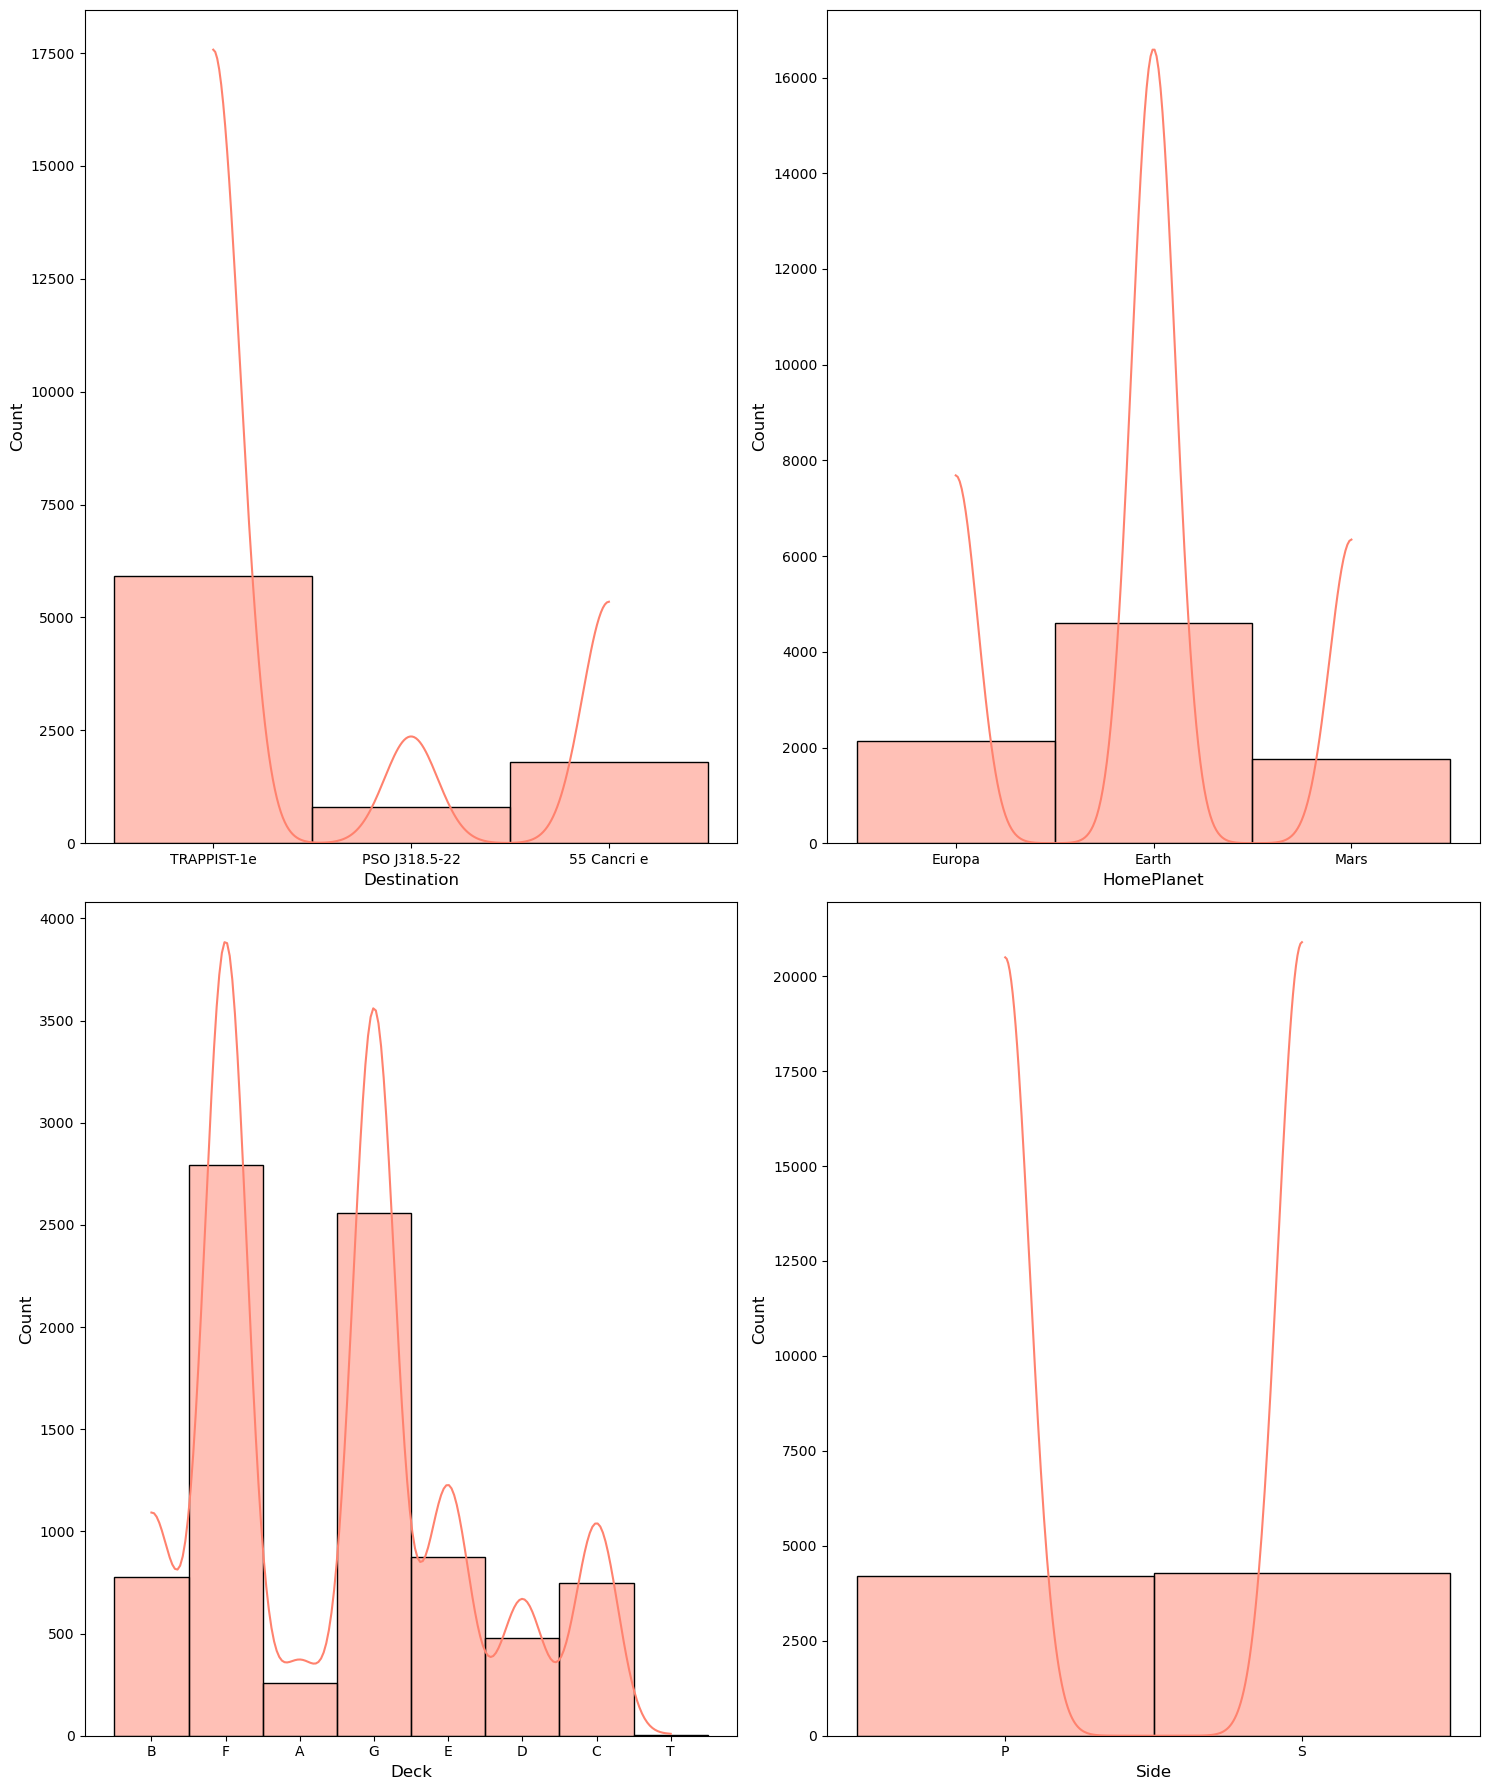

In [163]:
fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 18))




sns.histplot(data=df_categorical, x='Destination', kde=True, ax=ax[0, 0])
ax[0, 0].set_xlabel('Destination', fontsize=12)
ax[0, 0].set_ylabel('Count', fontsize=12)

sns.histplot(data=df_categorical, x='HomePlanet' , ax=ax[0, 1] , kde=True)
ax[0, 1].set_xlabel('HomePlanet', fontsize=12)
ax[0, 1].set_ylabel('Count', fontsize=12)

sns.histplot(data=df_categorical, x='Deck' , ax=ax[1, 0], kde=True  )
ax[1, 0].set_xlabel('Deck', fontsize=12)
ax[1, 0].set_ylabel('Count', fontsize=12)

sns.histplot(data=df_categorical, x='Side' , ax=ax[1, 1], kde=True)
ax[1, 1].set_xlabel('Side', fontsize=12)
ax[1, 1].set_ylabel('Count', fontsize=12)


plt.tight_layout()





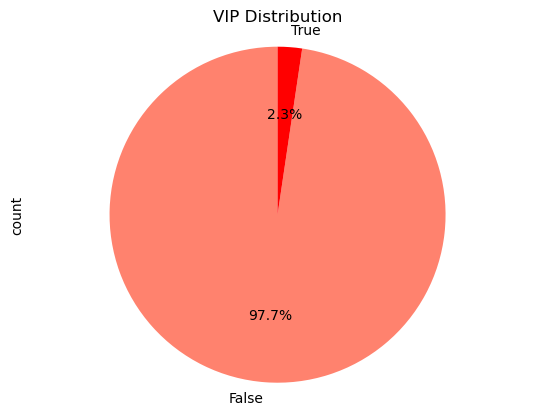

In [164]:
df_train['VIP'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,)
plt.title('VIP Distribution')
plt.axis('equal')
plt.show()

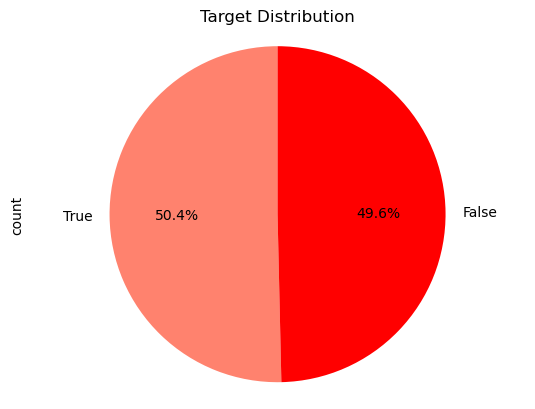

In [165]:
df_train['Transported'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,)
plt.title('Target Distribution')
plt.axis('equal')
plt.show()

## Inference:


In [166]:
categorical_features = categorical_features.drop(['Cabin' , 'Name' , 'PassengerId'])
categorical_features

Index(['CryoSleep', 'Destination', 'HomePlanet', 'Transported', 'VIP'], dtype='object')

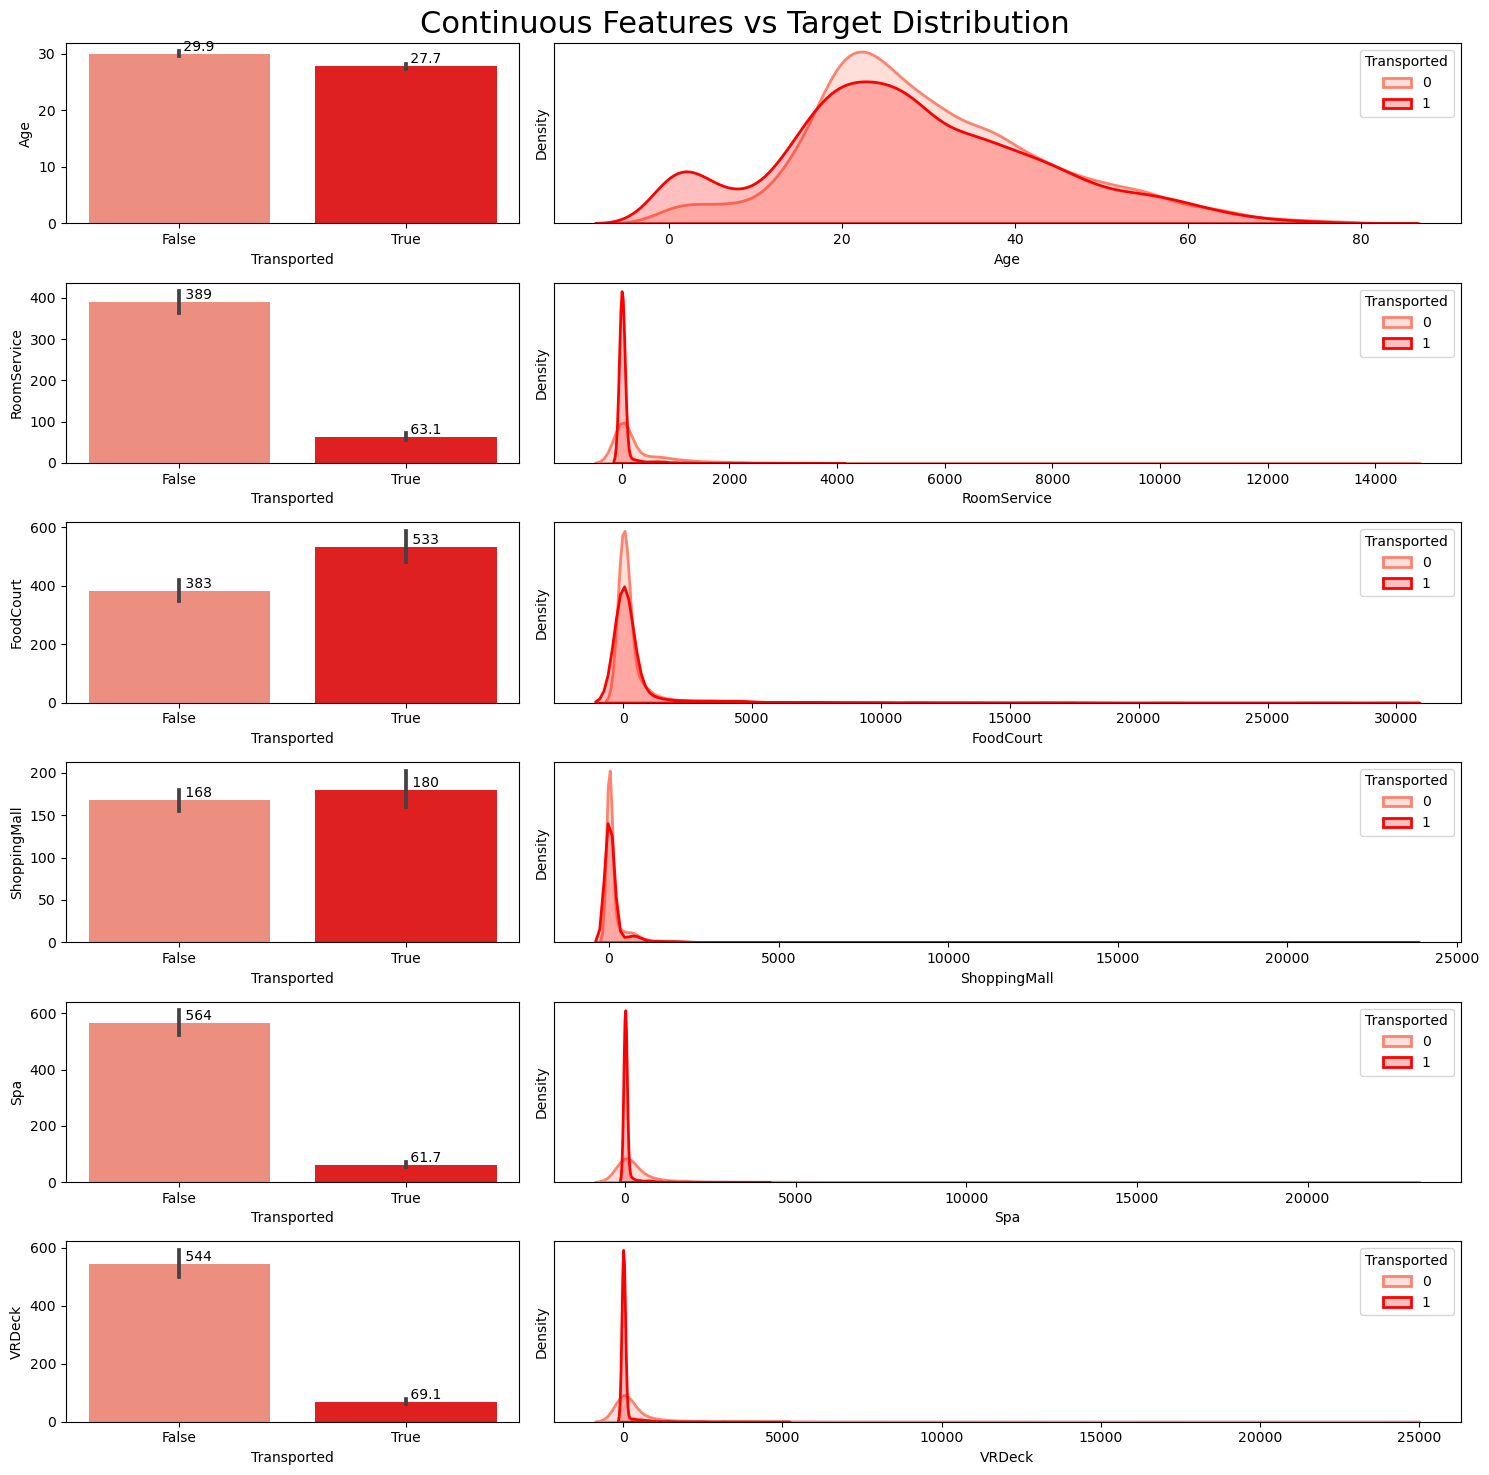

In [167]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df_train, x="Transported", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df_train[df_train["Transported"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df_train[df_train["Transported"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Transported', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

In [168]:
categorical_features = df_categorical.columns

In [169]:
df_categorical

,Cabin,CryoSleep,Destination,HomePlanet,Transported,VIP,Deck,Side
0,B/0/P,False,TRAPPIST-1e,Europa,False,False,B,P
1,F/0/S,False,TRAPPIST-1e,Earth,True,False,F,S
2,A/0/S,False,TRAPPIST-1e,Europa,False,True,A,S
3,A/0/S,False,TRAPPIST-1e,Europa,False,False,A,S
4,F/1/S,False,TRAPPIST-1e,Earth,True,False,F,S
...,...,...,...,...,...,...,...,...
8688,A/98/P,False,55 Cancri e,Europa,False,True,A,P
8689,G/1499/S,True,PSO J318.5-22,Earth,False,False,G,S
8690,G/1500/S,False,TRAPPIST-1e,Earth,True,False,G,S
8691,E/608/S,False,55 Cancri e,Europa,False,False,E,S


In [170]:
# Remove 'Transported' from the categorical_features
categorical_features = categorical_features.drop(['Transported' , 'Cabin'])

In [171]:
categorical_features

Index(['CryoSleep', 'Destination', 'HomePlanet', 'VIP', 'Deck', 'Side'], dtype='object')

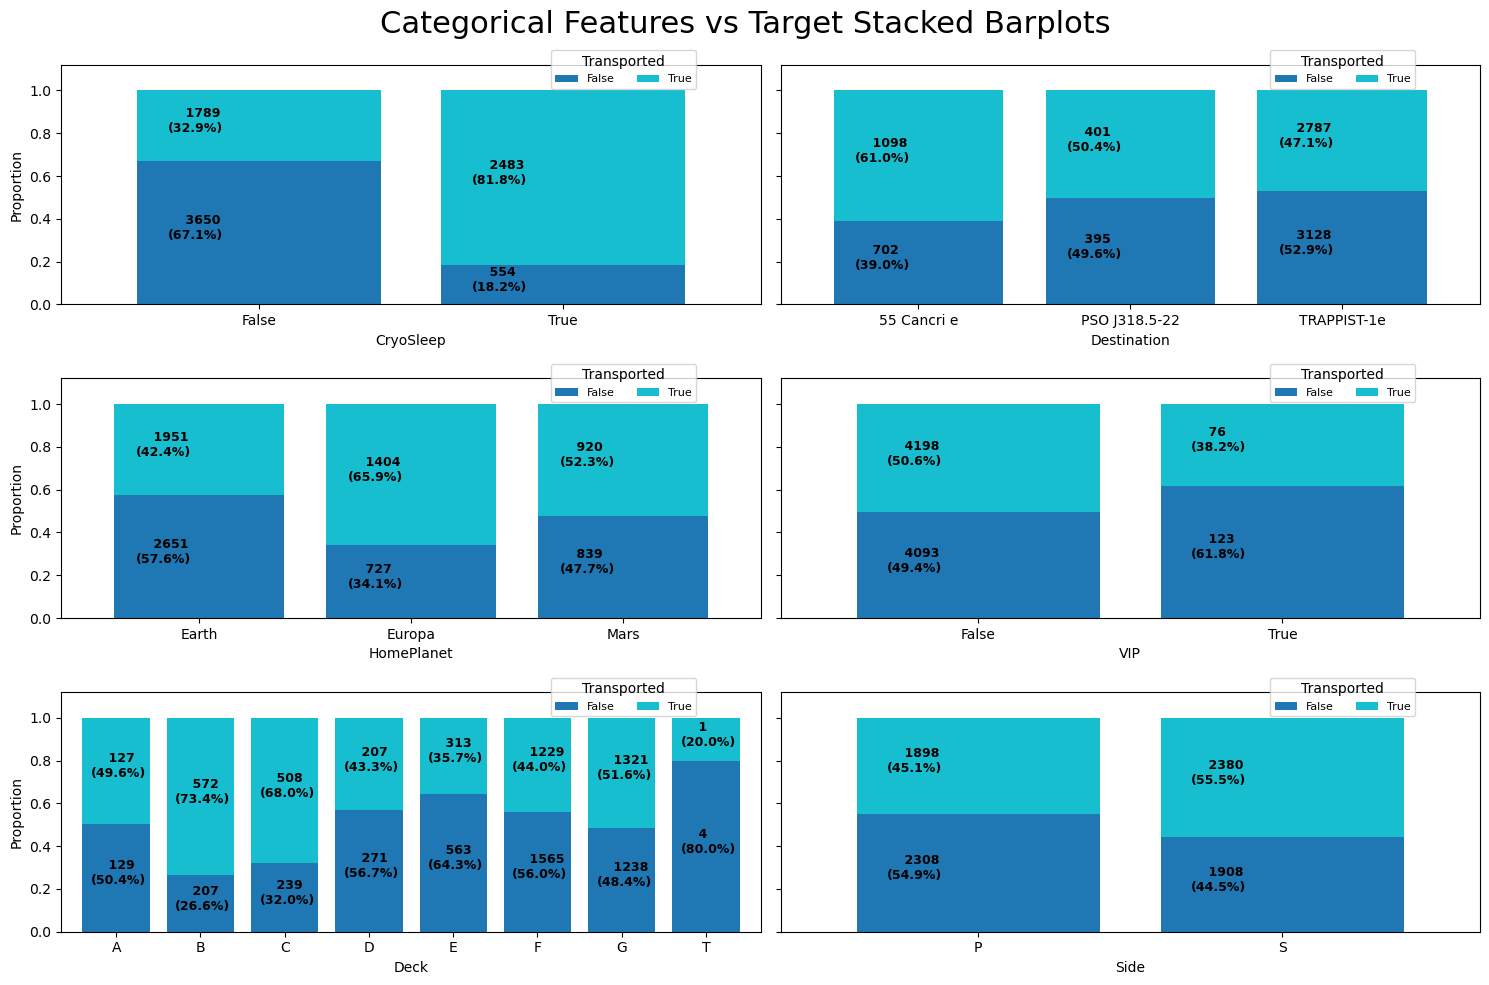

In [172]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

for i,col in enumerate(categorical_features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df_categorical[col], columns=df_train['Transported'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df_categorical[col], columns=df_train['Transported'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot stacked bar charts
    x, y = i//2, i%2
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap='tab10' ,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='Transported', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    
            
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

## Inference:

- ``CryoSleep``: The people who take the cryosleep have the highest transported rate of 81.8% .

- ``HomePlanet``: The people from the planet 'Europa' have the highest transported rate of 65.9% .

- ``VIP``: The most of the VIP passangers couldn't transported rate of 61.8% .

- ``Deck``: The people from the deck 'B' have the highest transported rate of 73.4% . 

- ``Side``: The people from the side 'Side' have the highest transported rate of 55.5% .

##  Missing Value Treatment

In [173]:
# Remove name because it is not useful for the model
df_train.drop(['Name'], axis=1, inplace=True)
df_test.drop(['Name'], axis=1, inplace=True)


In [174]:
# Separate Cabin into 3 columns
df_train[['Deck', 'Num', 'Side']] = df_train['Cabin'].apply(parse_cabin)
df_test[['Deck', 'Num', 'Side']] =  df_test['Cabin'].apply(parse_cabin)

# Drop original columns
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

## Imputation Missing Values

In [175]:

# Check for missing values in the dataset
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck            199
Num             199
Side            199
dtype: int64

In [176]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Deck            100
Num             100
Side            100
dtype: int64

In [177]:
categorical_features

Index(['CryoSleep', 'Destination', 'HomePlanet', 'VIP', 'Deck', 'Side'], dtype='object')

In [178]:
def fillnan(df , features , strategy):
    if strategy == 'mode':
        df[features] = df[features].fillna(df[features].mode().iloc[0])
    elif strategy == 'median':
        df[features] = df[features].fillna(df[features].median().iloc[0])
    elif strategy == 'mean':
        df[features] = df[features].fillna(df[features].mean().iloc[0])
    else:
        print('Invalid strategy')

    return df



In [179]:
df_train = fillnan(df_train, categorical_features, 'mode')
df_test = fillnan(df_test, categorical_features, 'mode')

In [180]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   object 
 12  Deck          8693 non-null   object 
 13  Num           8494 non-null   object 
 14  Side          8693 non-null   object 
dtypes: bool(2), float64(6), object(7)
memory usage: 900.0+ KB


In [181]:
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns

In [182]:
numerical_features

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [183]:
# fill missing values in numerical columns

df_train = fillnan(df_train, numerical_features, 'mean')
df_test = fillnan(df_test, numerical_features, 'mean')

df_train.drop(['PassengerId' , 'Num'], axis=1, inplace=True)

## Preprocessing

In [184]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [185]:
categorical_features , numerical_features

(Index(['CryoSleep', 'Destination', 'HomePlanet', 'VIP', 'Deck', 'Side'], dtype='object'),
 Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object'))

In [187]:
X = df_train.drop('Transported', axis=1)
y = df_train['Transported'].astype('int')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
])

X_processed = preprocessor.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=17)

In [188]:
import lazypredict

ModuleNotFoundError: No module named 'lazypredict'